In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

# Montamos nuestro disco de Google Drive
drive.mount("/content/drive", force_remount=True)

---

#**Bloque I**: Tranformaciones geométricas

- Aprenderemos a realizar transformaciones geométricas de imágenes digitales (traslación, rotación y escalado).


---

##**Ejemplo I.1**: Traslación

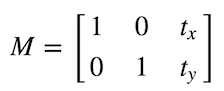

---

**Función** ***warpAffine***

Sintaxis: cv2.warpAffine(imagen, matriz, (alto, ancho))

Parámetros de entrada:
- imagen: imagen sobre la que vamos a aplicar la transformación afín
- matriz: matriz de transformación
- (alto, ancho): dimensiones de la imagen

Valor de retorno:
- devuelve la imagen con la transformación realizada

---

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'teide.jpg'
path += nombre_imagen

# Leemos la imagen y la convertimos a RGB
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

alto, ancho = imgRGB.shape[:2]
print(f"Tamaño de la imagen (Alto, Ancho): ({alto}, {ancho})")

# Matriz de traslación (180 píxeles en horizontal y -40 píxeles en vertical)
M = np.float32([
    [1,0, 180],
    [0,1, -40]
])

# Aplicamos la traslación afín
img_trasladada = cv2.warpAffine(imgRGB, M, (ancho,alto))

# Mostramos la imagen original y la trasladada
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)
plt.subplot(122), plt.title("Trasladada"), plt.axis("off")
plt.imshow(img_trasladada)
plt.show()


---

##**Ejemplo I.2**: Rotación

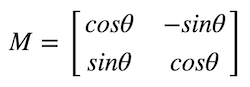

---


In [ ]:
# Parámetros de la rotación
angulo = 45
centro = (ancho/2, alto/2)
escala = 1.0

# Calculamos la matriz de transformación conforme a los parámetros indicados
M = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicamos la transformación afín
img_rotada = cv2.warpAffine(imgRGB, M, (ancho,alto))

# Mostramos la imagen original y la transformada
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)
plt.subplot(122), plt.title("Rotada"), plt.axis("off")
plt.imshow(img_rotada)
plt.show()


---

##**Ejemplo I.3**: Rotación con escalado

En OpenCV se puede hacer una rotación con escalado y seleccionando el centro de rotación para rotar desde cualquier punto que deseemos.

Para definir esta matriz de transformación en OpenCV se emplea la función *cv.getRotationMatrix2D(centro, ángulo, escala)*

---


In [ ]:
# Parámetros de la rotación
angulo = 90
centro = (ancho/2,alto/2)
escala = 0.6

# Calculamos la matriz de transformación conforme a los parámetros indicados
M = cv2.getRotationMatrix2D(centro, angulo, escala)

# Aplicamos la transformación afín
img_rotada = cv2.warpAffine(imgRGB, M, (ancho,alto))

# Mostramos la imagen original y la transformada
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)
plt.subplot(122), plt.title("Rotada y Escalada"), plt.axis("off")
plt.imshow(img_rotada)
plt.show()


---

##**Ejemplo I.4**: Escalado o cambio de tamaño

Para tener más control en el método a emplear para realizar el cambio de tamaño de una imagen en OpenCV se emplea la función resize que:

- Esta función la podemos utilizar indicando únicamente los nuevos tamaños en ancho y en alto o indicando factores de escala tanto en x como en y, y un método de interpolación concreto

Métodos de interpolación:

- Interpolación lineal (**cv2.INTER_LINEAR**): utilizada para ampliar tamaños (valor por defecto)
- Interpolación cúbica (**cv2.INTER_CUBIC**): utilizada para ampliar tamaños (más lenta que la interpolación lineal)
- Interpolación bilineal (**cv2.INTER_AREA**): la más utilizada para reducir tamaños

---


In [ ]:
# Imagen original
print(f'\nImagen original (Alto, Ancho): ({imgBGR.shape[0]}, {imgBGR.shape[1]})\n')
cv2_imshow(imgBGR)

# Cambiamos el tamaño a 300 píxeles de ancho por 100 píxeles de alto
valores_fijos = cv2.resize(imgBGR, (300, 100))
print(f'\nImagen después de poner unos valores fijos (Alto, Ancho): ({valores_fijos.shape[0]}, {valores_fijos.shape[1]})\n')
cv2_imshow(valores_fijos)

# Cambiamos el tamaño utlizando fx=2, fy=2 e interpolación cúbica
resize_cubic = cv2.resize(imgBGR,(0, 0),fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
print(f'\nImagen después de fx=2, fy=2 e interpolación cúbica (Alto, Ancho): ({resize_cubic.shape[0]}, {resize_cubic.shape[1]})\n')
cv2_imshow(resize_cubic)

# Cambiamos el tamaño utlizando fx=0.5, fy=0.7 e interpolación bilineal
resize_area = cv2.resize(imgBGR,(0, 0),fx=0.5, fy=0.7, interpolation = cv2.INTER_AREA)
print(f'\nImagen después de fx=0.5, fy=0.7 e interpolación bilineal (Alto, Ancho): ({resize_area.shape[0]}, {resize_area.shape[1]})\n')
cv2_imshow(resize_area)

# Cambiamos el tamaño utlizando fx=2.5, fy=0.5 e interpolación lineal
resize_linear = cv2.resize(imgBGR,(0, 0),fx=2.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
print(f'\nImagen después de fx=2.5, fy=0.5 e interpolación lineal (Alto, Ancho): ({resize_linear.shape[0]}, {resize_linear.shape[1]})\n')
cv2_imshow(resize_linear)


---

##**Ejemplo I.5**: Transformación afín con 3 puntos

Empleando la función cv2.getAffineTransform podemos crear una matriz de transformación definiendo 3 puntos en la imagen original y otro 3 puntos en la imagen resultado de la transformación:

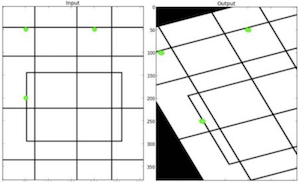

---


In [ ]:
# Coordenadas de los 3 puntos en la imagen de origen
pts1 = np.float32([[50,50],[200,50],[50,200]])
# Coordenadas de los 3 puntos en la imagen de destino
pts2 = np.float32([[10,100],[200,50],[100,250]])

# Obtenemos la matriz de transformación
M = cv2.getAffineTransform(pts1,pts2)

# Aplicamos la transformación afín
img_transformada = cv2.warpAffine(imgRGB, M, (ancho,alto))

# Mostramos la imagen original y la transformada
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)
plt.subplot(122), plt.title("Transformada"), plt.axis("off")
plt.imshow(img_transformada)
plt.show()

---

##**Ejemplo I.6**: Transformación de Perspectiva

Con la función *cv2.getPerspectiveTransform* podemos construir una matriz de transformación de perspectiva si le proporcionamos las coordenadas de 4 puntos de la imagen original y las coordenadas de esos mismos 4 puntos en la imagen de destino donde queremos posicionarlos

**Nota**: las coordenadas de los puntos se refencian como (ancho, alto) y el orden de los cuatro puntos del rectángulo es: arriba-izquierda, arriba-derecha, abajo-derecha, abajo-izquierda

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'sudoku.jpg'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

alto, ancho = img.shape[:2]
print(f"(Ancho, Alto): ({ancho}, {alto})")

# Pintamos los 4 puntos del cuadrado principal del sudoku
# cv2.circle(imagen, centro (ancho, alto), radio, color, grosor)
cv2.circle(img, (70,110), 3, 255, 5)
cv2.circle(img, (660,200), 3, 255, 5)
cv2.circle(img, (670,780), 3, 255, 5)
cv2.circle(img, (50,840), 3, 255, 5)

# Coordenadas de los 3 puntos en la imagen de origen y destino
# arriba-izquierda, arriba-derecha, abajo-derecha, abajo-izquierda
pts1 = np.float32([[70,110],[660,200], [670,780],[50,840]])
pts2 = np.float32([[20,20],[680,20],[680,853],[20,853]])

# Obtenemos la matriz de transformación
M = cv2.getPerspectiveTransform(pts1, pts2)

# Aplicamos la transformación de perspectiva
img_transformada = cv2.warpPerspective(img, M, (ancho,alto))

# Mostramos la imagen original y la transformada
plt.subplot(121), plt.title("Original"), plt.axis("on")
plt.imshow(img, "gray")
plt.subplot(122), plt.title("Transformada"), plt.axis("on")
plt.imshow(img_transformada, "gray")
plt.show()

---

#**EJERCICO 1**: Transformación de perspectiva

**Enunciado**:

- Abrir la imagen sudoku.jpg
- Encontrar las coordenadas del rectángulo que definen el cuadrado central del sudoku (el que tiene un 1, un 9, un 8 y un 5 en sus cuatro esquinas)
- Realizar una transformación de perspectiva de dicho cuadrado central
- Mostrar el resultado de dicha transformación en una imagen en la que únicamente aparezca dicho cuadrado central

---


---

#**Bloque II**: Transformaciones de niveles mediante tablas Look-Up

- Aprenderemos a realizar transformaciones de niveles empleando tablas Look-Up (Look Up Tables o LUT).



---

##**Ejemplo II.1**: Transformación inversa, cuadrática y cúbica

---

In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'yelmo.png'
path += nombre_imagen

# Leemos la imagen
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Construimos las 3 tablas LUT con todos sus valores a cero
tablaInversa = np.zeros((256, 1), dtype = np.uint8)
tablaSqrt = np.zeros((256, 1), dtype = np.uint8)
tablaCubica = np.zeros((256, 1), dtype = np.uint8)

# Rellenamos las LUT con los valores adecuados
for i in range(0,256):
    # Función Inversa
    tablaInversa[i] = 255 - i
    # Función Sqrt
    tablaSqrt[i] = (i*255)**(1/2)
    # Función Cúbica
    tablaCubica[i] = (i**3)/255**2

# Aplicamos las 3 LUT y obtenemos las imágenes resultado
resInversa = cv2.LUT(img, tablaInversa)
resSqrt = cv2.LUT(img, tablaSqrt)
resCubica = cv2.LUT(img, tablaCubica)

# Mostramos la imagen original y las 3 imágenes transformadas
plt.subplot(221), plt.title('original'), plt.axis("off")
plt.imshow(img, 'gray')
plt.subplot(222), plt.title('inversa'), plt.axis("off")
plt.imshow(resInversa, 'gray')
plt.subplot(223), plt.title('sqrt'), plt.axis("off")
plt.imshow(resSqrt, 'gray')
plt.subplot(224), plt.title('cúbica'), plt.axis("off")
plt.imshow(resCubica, 'gray')
plt.show()

---

##**Ejemplo II.2**: Transformación gamma y su inversa

---


In [ ]:
# Valor de gamma
gamma = 0.3
invGamma = 1.0 / gamma

# Rellenamos las LUT con los valores adecuados
tablaGamma = np.array([((i / 255.0) ** gamma) * 255
	for i in np.arange(0, 256)]).astype("uint8")
tablaInvGamma = np.array([((i / 255.0) ** invGamma) * 255
	for i in np.arange(0, 256)]).astype("uint8")

# Mostramos los valores de las dos LUT
print(tablaGamma)
plt.plot(tablaGamma)
print("LUT gamma")
plt.show()

print(tablaInvGamma)
plt.plot(tablaInvGamma)
print("LUT gamma inversa")
plt.show()

# Aplicamos las 2 LUT y obtenemos las imágenes resultado
resGamma = cv2.LUT(img, tablaGamma)
resInvGamma = cv2.LUT(img, tablaInvGamma)

# Mostramos la imagen original y las 2 imágenes transformadas
plt.subplot(131), plt.title('original'), plt.axis("off")
plt.imshow(img, 'gray')
plt.subplot(132), plt.title('gamma'), plt.axis("off")
plt.imshow(resGamma, 'gray')
plt.subplot(133), plt.title('gamma inversa'), plt.axis("off")
plt.imshow(resInvGamma, 'gray')
plt.show()

---

##**Ejemplo II.3**: Transformación gamma en una imagen en color

---


In [ ]:
# Construimos el path de la imagen que vamos a leer del drive
path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'bosque.jpeg'
path += nombre_imagen

# Leemos la imagen y la convertimos a RGB
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

# Parámetro gamma
gamma = 0.7

# Rellenamos las LUT con los valores adecuados
r = np.array([((i / 255.0) ** gamma) * 255
	for i in np.arange(0, 256)]).astype("uint8")
g = np.array([((i / 255.0) ** gamma) * 255
	for i in np.arange(0, 256)]).astype("uint8")
b = np.array([((i / 255.0) ** gamma) * 255
	for i in np.arange(0, 256)]).astype("uint8")

# Construye matriz con los 3 planos de color
lut = np.dstack((r, g, b))

# Aplicamos la LUT en los 3 planos
dstImage = cv2.LUT(imgRGB, lut)

# Mostramos la imagen original y el resultado de aplicar transformación gamma
plt.subplot(121), plt.title("Original"), plt.axis("off")
plt.imshow(imgRGB)
plt.subplot(122), plt.title("Corrección Gamma"), plt.axis("off")
plt.imshow(dstImage)
plt.show()

---

#**EJERCICO 2**: Corrección Gamma

**Enunciado**:

- Realizar correcciones gamma de las siguientes imágenes: gato.jpg , soledad.jpeg y esperando.jpeg

**Comentarios**:

Considerar el método más adecuado en función del tipo de imagen (gamma o gamma inversa) y lso valores más adecuados para el parámetro gamma.

---
